In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/malditof-salmonella-peaks/NMFLabel2.csv
/kaggle/input/malditof-salmonella-peaks/NMFMat2.csv
/kaggle/input/malditof-salmonella-peaks/NMFNorm.csv
/kaggle/input/malditof-salmonella-peaks/NMFLabel3.csv
/kaggle/input/malditof-salmonella-peaks/SalmonellaMSUnprocessed.csv
/kaggle/input/malditof-salmonella-peaks/SalmonellaMS.csv
/kaggle/input/malditof-salmonella-peaks/UnprocessedMS.csv
/kaggle/input/malditof-salmonella-peaks/NMFLabel.csv


In [2]:
df=pd.read_csv("../input/malditof-salmonella-peaks/NMFLabel3.csv")
df

,Serovar,Component 0,Component 1,Component 2,Component 3,Component 4
0,Agona,1.045696,0.038418,0.241012,0.000000,0.000000
1,Agona,1.198353,0.087550,0.000000,0.096505,0.028569
2,Agona,1.050278,0.000000,0.331209,0.060413,0.005799
3,Agona,0.692398,0.000000,0.350697,0.142777,0.079818
4,Agona,0.423687,0.025376,0.386852,0.116234,0.008889
...,...,...,...,...,...,...
195,Typhimurium,0.000000,0.000000,0.075569,0.949131,0.000000
196,Typhimurium,0.000000,0.003009,0.195569,1.077650,0.000000
197,Typhimurium,0.147924,0.000000,0.330131,1.027866,0.000000
198,Typhimurium,0.206548,0.048148,0.078539,0.868646,0.000000


In [3]:
df["Serovar"].value_counts()

Agona          40
Albany         40
Altona         40
Enteriditis    40
Typhimurium    40
Name: Serovar, dtype: int64

In [4]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]
X.head()

,Component 0,Component 1,Component 2,Component 3,Component 4
0,1.045696,0.038418,0.241012,0.000000,0.000000
1,1.198353,0.087550,0.000000,0.096505,0.028569
2,1.050278,0.000000,0.331209,0.060413,0.005799
3,0.692398,0.000000,0.350697,0.142777,0.079818
4,0.423687,0.025376,0.386852,0.116234,0.008889


In [5]:
#X['Ratio']=X['Component 0']-X['Component 2']

In [6]:
X

,Component 0,Component 1,Component 2,Component 3,Component 4
0,1.045696,0.038418,0.241012,0.000000,0.000000
1,1.198353,0.087550,0.000000,0.096505,0.028569
2,1.050278,0.000000,0.331209,0.060413,0.005799
3,0.692398,0.000000,0.350697,0.142777,0.079818
4,0.423687,0.025376,0.386852,0.116234,0.008889
...,...,...,...,...,...
195,0.000000,0.000000,0.075569,0.949131,0.000000
196,0.000000,0.003009,0.195569,1.077650,0.000000
197,0.147924,0.000000,0.330131,1.027866,0.000000
198,0.206548,0.048148,0.078539,0.868646,0.000000


In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=69,stratify=df["Serovar"])
Y_train.value_counts()/len(Y_train)

Enteriditis    0.2
Albany         0.2
Altona         0.2
Typhimurium    0.2
Agona          0.2
Name: Serovar, dtype: float64

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100,min_samples_leaf=20)

clf.fit(X_train,Y_train)

Y_pred=clf.predict(X_test)

In [9]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.95


In [10]:
from sklearn import tree
dtree=tree.DecisionTreeClassifier(min_samples_leaf=5,random_state=45)
dtree=dtree.fit(X_train,Y_train)
Y_pred=dtree.predict(X_test)

In [11]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9833333333333333


In [12]:
from matplotlib import pyplot as plt

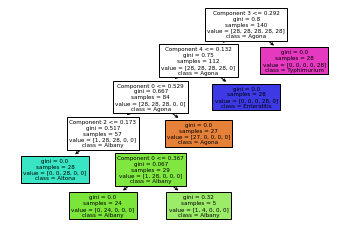

In [13]:
tree.plot_tree(dtree,feature_names=["Component 0","Component 1","Component 2","Component 3","Component 4"],class_names=["Agona","Albany","Altona","Enteriditis","Typhimurium"],filled=True)
plt.show()

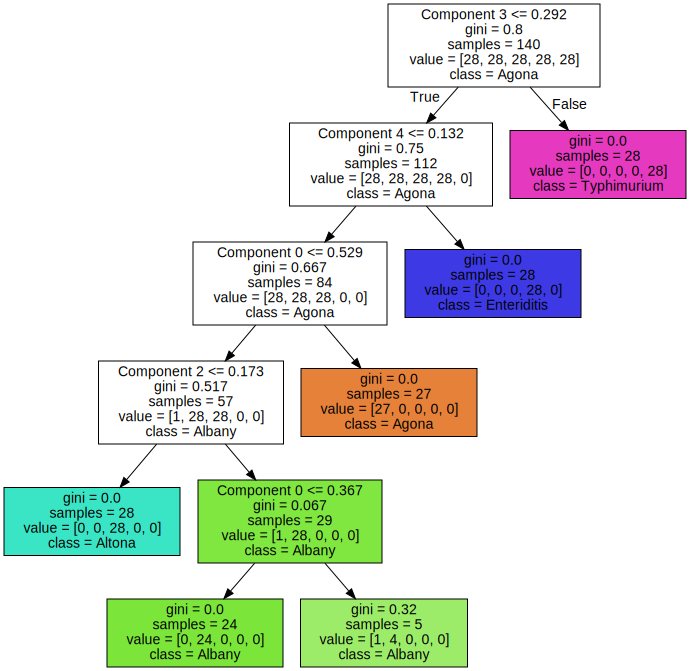

In [14]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dtree, out_file=None,feature_names=["Component 0","Component 1","Component 2","Component 3","Component 4"],class_names=["Agona","Albany","Altona","Enteriditis","Typhimurium"],filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="jpg") 
graph

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

       Agona       1.00      0.92      0.96        12
      Albany       0.92      1.00      0.96        12
      Altona       1.00      1.00      1.00        12
 Enteriditis       1.00      1.00      1.00        12
 Typhimurium       1.00      1.00      1.00        12

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [16]:
cm=confusion_matrix(Y_test,Y_pred)

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtree.classes_)

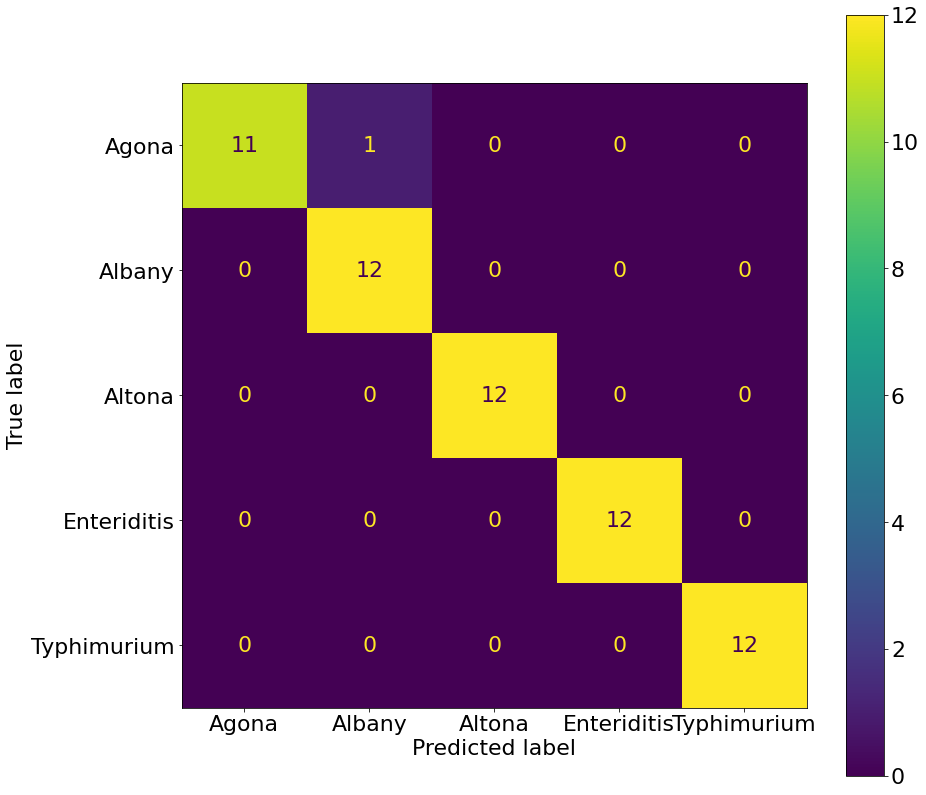

In [23]:
fig=ConfusionMatrixDisplay.from_estimator(dtree, X_test, Y_test).ax_.get_figure()
fig.set_figwidth(14)
fig.set_figheight(14)  
plt.rcParams.update({'font.size': 22})

plt.show()

In [19]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
scores = cross_val_score(dtree, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.980 (0.033)
